In [1]:
import pandas as pd
import plotly.express as px
from pandas.core.reshape.merge import merge
from sklearn.feature_extraction.text import CountVectorizer#transform text to vector
from sklearn.metrics.pairwise import cosine_similarity#cosine simiarity package
from sklearn.neighbors import NearestNeighbors#knn package


C:\Users\admin\AppData\Local\Temp\ipykernel_11500\1794836202.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
data = movies.merge (credits,on = 'title')#new data set after merging

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [8]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [9]:

data = data[['movie_id','title','overview','genres','keywords','cast','crew','release_date','vote_average','vote_count','popularity']]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4809 non-null   int64  
 1   title         4809 non-null   object 
 2   overview      4806 non-null   object 
 3   genres        4809 non-null   object 
 4   keywords      4809 non-null   object 
 5   cast          4809 non-null   object 
 6   crew          4809 non-null   object 
 7   release_date  4808 non-null   object 
 8   vote_average  4809 non-null   float64
 9   vote_count    4809 non-null   int64  
 10  popularity    4809 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 413.4+ KB


In [11]:
data.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800,150.437577


In [12]:
data.isnull().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
release_date    1
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
len(data)

4805

In [15]:
data.isnull().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
release_date    0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [16]:
data.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [17]:
data.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [18]:

new_types={'title': str,'overview': str,'release_date': 'datetime64[ns]'}
for col in new_types.keys():
    data[col]=data[col].astype(new_types[col])


In [19]:
def get_uniques(data,col):
    out=set([val.strip().lower() for val in ','.join(data[col].unique()).split(',')])
    try:
        out.remove('')
    except:
        return list(out)
    return list(out)

In [20]:
genres = get_uniques(data,'genres')
keywords = get_uniques(data,'keywords')
cast = get_uniques(data,'cast')
crew = get_uniques(data,'crew')

In [21]:
print(data['genres'])

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4804    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4805    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4806    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4807                                                   []
4808                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4805, dtype: object


In [22]:
data.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [23]:
from tqdm import tqdm
def get_counts(data, col, categories):
    categ = {(category): None for category in categories}
    for category in tqdm(categories):
        val=0
        for index in data.index:
            if category in data.at[index,col].lower():
                val+=1
        categ[category]=val
    return categ

In [24]:
import plotly.express as px
base_counts = get_counts(data, 'genres', genres)
base_counts = pd.DataFrame(index=base_counts.keys(),
                           data=base_counts.values(),
                           columns=['Counts'])
base_counts.sort_values(by='Counts', inplace=True)
# Plot the chart which shows top genres and separate by color where genre<1000
colors=['#abaeab' if i<1000 else '#A0E045' for i in  base_counts.Counts]
fig = px.bar(x=base_counts.index,
             y=base_counts['Counts'],
             title='Most Popular Genre',color_discrete_sequence=colors,color=base_counts.index)
fig.show()

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████| 81/81 [00:01<00:00, 43.46it/s]


In [25]:
import plotly.express as px

def plot_value_counts_bar(data, col):
    vc = pd.DataFrame(data[col].value_counts())
    vc['year'] = vc.index
    fig = px.bar(vc, x='year', y='count', color='year', title=col)
    return fig

data['cat'] = data.release_date.dt.year
plot_value_counts_bar(data, 'cat')


In [26]:
data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,6.9,4500,139.082615,2007
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,6.3,4466,107.376788,2015
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,7.6,9106,112.312950,2012
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,6.1,2124,43.926995,2012


In [27]:

#change the formate into list
def convert(obj):
  l=[]
  for i in ast.literal_eval(obj) :
      l.append(i['name'])
  return l

In [28]:

import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [29]:
data['genres']=data['genres'].apply(convert)


In [30]:

data['keywords'] = data['keywords'].apply(convert)

In [31]:


data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,6.9,4500,139.082615,2007
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,6.3,4466,107.376788,2015
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,7.6,9106,112.312950,2012
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,6.1,2124,43.926995,2012


In [32]:
#to take cast of top 3
def convert3(obj):
  l=[]
  counter = 0
  for i in ast.literal_eval(obj):
    if counter!= 3:
      l.append(i['name'])
      counter+=1
    else:
         break
  return l

In [33]:
data['cast']=data['cast'].apply(convert3)

In [34]:

data.head()


,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,6.9,4500,139.082615,2007
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,6.3,4466,107.376788,2015
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,7.6,9106,112.312950,2012
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,6.1,2124,43.926995,2012


In [35]:
data['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [36]:
#fetching direction from jobs
def fetch_director (obj):
  l=[]
  for i in ast.literal_eval(obj) :
    if i['job'] == 'Director':
      l.append(i['name'])
      break
  return l

In [37]:

data['crew'] = data['crew'].apply(fetch_director)

In [38]:
data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,7.2,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007-05-19,6.9,4500,139.082615,2007
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015-10-26,6.3,4466,107.376788,2015
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],2012-07-16,7.6,9106,112.312950,2012
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],2012-03-07,6.1,2124,43.926995,2012


In [39]:

data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:
data['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [41]:
data['overview'] = data['overview'].apply( lambda x:x.split())

In [42]:
data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,7.2,11800,150.437577,2009
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007-05-19,6.9,4500,139.082615,2007
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],2015-10-26,6.3,4466,107.376788,2015
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],2012-07-16,7.6,9106,112.312950,2012
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],2012-03-07,6.1,2124,43.926995,2012


In [43]:

data['genres']= data['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [44]:
data['keywords']= data['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [45]:

data['cast']=data['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [46]:
data['crew']= data['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [47]:
data['tags']=data['overview']+data['genres']+data['keywords']+data['cast']+data['crew']

In [48]:
data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,popularity,cat,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,7.2,11800,150.437577,2009,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007-05-19,6.9,4500,139.082615,2007,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],2015-10-26,6.3,4466,107.376788,2015,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],2012-07-16,7.6,9106,112.312950,2012,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],2012-03-07,6.1,2124,43.926995,2012,"[John, Carter, is, a, war-weary,, former, mili..."


In [49]:
new_df = data[['movie_id','title','tags','popularity','vote_average','genres']]


In [50]:

new_df

,movie_id,title,tags,popularity,vote_average,genres
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,7.2,"[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,6.9,"[Adventure, Fantasy, Action]"
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,6.3,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,7.6,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,6.1,"[Action, Adventure, ScienceFiction]"
...,...,...,...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui...",14.269792,6.6,"[Action, Crime, Thriller]"
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended...",0.642552,5.9,"[Comedy, Romance]"
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,...",1.444476,7.0,"[Comedy, Drama, Romance, TVMovie]"
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is...",0.857008,5.7,[]


In [51]:

new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_11500\10486369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
new_df.head()

,movie_id,title,tags,popularity,vote_average,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,"[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,"[Adventure, Fantasy, Action]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,"[Action, Adventure, ScienceFiction]"


In [104]:



new_df['tags'][5]

"The seemingly invincible Spider-Man goes up against an all-new crop of villain – including the shape-shifting Sandman. While Spider-Man’s superpowers are altered by an alien organism, his alter ego, Peter Parker, deals with nemesis Eddie Brock and also gets caught up in a love triangle. Fantasy Action Adventure dualidentity amnesia sandstorm loveofone'slife forgiveness spider wretch deathofafriend egomania sand narcism hostility marvelcomic sequel superhero revenge TobeyMaguire KirstenDunst JamesFranco SamRaimi"

In [54]:
new_df.head()

,movie_id,title,tags,popularity,vote_average,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,"[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,"[Adventure, Fantasy, Action]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,"[Action, Adventure, ScienceFiction]"


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

def recommend_new(movie_content):
    x_test = [[movie_content]]

    # TF-IDF
    tfidf = TfidfVectorizer(stop_words='english')

    
    tfidf_matrix = tfidf.fit_transform(new_df['tags'])

    # TF-IDF for the input movie overview
    tfidf_test = tfidf.transform(x_test[0])

    # Find nearest neighbors based on cosine similarity
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(tfidf_matrix)
    distances, indices = model_knn.kneighbors(tfidf_test, n_neighbors=6)  # Including the input movie itself

    # Extract movie information for recommended movies
    recommended_movies = []
    for i in range(1, len(distances.flatten())):  # Exclude the input movie
        index = indices.flatten()[i]
        recommended_movies.append(new_df.iloc[index]['title'])  # Assuming 'original_title' is the correct column name
    #print(recommended_movies)
    return recommended_movies


In [56]:
movies=recommend_new("The story of an ancient war that is reignited when a young farmhand unwittingly opens a gateway")
print("Recommended Movies:",movies)

Recommended Movies: ['The Best Man Holiday', 'Mirrors', 'Blonde Ambition', 'Extreme Ops', 'The Horseman on the Roof']


## **IMDB-DATASET**

In [57]:

import numpy as np
import pandas as pd
from pandas.core.reshape.merge import merge

In [60]:
import pandas as pd
# Load the IMDb rating dataset into a pandas dataframe
rating_csv = pd.read_csv('title-rating.csv')
basics_csv=pd.read_csv('title_basics.csv')


C:\Users\admin\AppData\Local\Temp\ipykernel_11500\3635415454.py:4: DtypeWarning:

Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.



In [61]:

basics_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549346 entries, 0 to 8549345
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 587.0+ MB


In [62]:
basics_csv.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [63]:
basics_csv.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [64]:
rating_csv.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2024
1,tt0000002,5.7,272
2,tt0000003,6.5,1958
3,tt0000004,5.4,178
4,tt0000005,6.2,2724


In [65]:

rating_csv.rename(columns={' tconst':'tconst'},inplace=True)

In [66]:
imdb_rating_df = pd.merge (rating_csv,basics_csv,on = 'tconst')

In [67]:
rating_csv.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [68]:
imdb_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299032 entries, 0 to 1299031
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1299032 non-null  object 
 1   averageRating   1299032 non-null  float64
 2   numVotes        1299032 non-null  int64  
 3   titleType       1299032 non-null  object 
 4   primaryTitle    1299031 non-null  object 
 5   originalTitle   1299031 non-null  object 
 6   isAdult         1299032 non-null  object 
 7   startYear       1299032 non-null  object 
 8   endYear         1299032 non-null  object 
 9   runtimeMinutes  1299032 non-null  object 
 10  genres          1299030 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.0+ MB


In [69]:
imdb_rating_df.duplicated().sum()

0

In [70]:

imdb_rating_df.drop(['tconst', 'titleType', 'primaryTitle', 'isAdult', 'endYear', 'runtimeMinutes'], axis=1, inplace=True)


In [71]:
imdb_rating_df.rename(columns={'originalTitle':'title','startYear':'year','genres':'genre'},inplace=True)

In [72]:
imdb_rating_df.dropna(inplace=True)

In [73]:
imdb_rating_df.to_csv('imdb_rating.csv')
new_df.to_csv('tmdb.csv')

In [74]:
imdb_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299029 entries, 0 to 1299031
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   averageRating  1299029 non-null  float64
 1   numVotes       1299029 non-null  int64  
 2   title          1299029 non-null  object 
 3   year           1299029 non-null  object 
 4   genre          1299029 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 59.5+ MB


In [75]:
imdb_rating_df

,averageRating,numVotes,title,year,genre
0,5.7,2024,Carmencita,1894,"Documentary,Short"
1,5.7,272,Le clown et ses chiens,1892,"Animation,Short"
2,6.5,1958,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
3,5.4,178,Un bon bock,1892,"Animation,Short"
4,6.2,2724,Blacksmith Scene,1893,"Comedy,Short"
...,...,...,...,...,...
1299027,7.6,11,6 Gunn,2017,\N
1299028,7.1,23,Episode #10.15,2019,"Family,Reality-TV"
1299029,7.2,36,Escape,2019,"Crime,Drama,Mystery"
1299030,8.8,6,Horrid Henry's Comic Caper,2014,"Adventure,Animation,Comedy"


In [76]:
import pandas as pd

# remove duplicates based on all columns
df1 = new_df.drop_duplicates(['title'])

# remove duplicates based on selected columns
df2 = imdb_rating_df.drop_duplicates(['title'])


In [77]:
import pandas as pd
# merge the two dataframes on common column(s)
merged_df = pd.merge(df1, df2, on='title')
new_df = merged_df

In [78]:
df=pd.read_csv('imdb_rating.csv')

In [79]:
highest_number_of_rating = df.groupby('title')[['averageRating']].count()
#ratings in improved-movie recomendation in github
# List of 10 movies with high number of ratings
highest_number_of_rating = highest_number_of_rating.nlargest(10, 'averageRating')

In [80]:
highest_number_of_rating.head()

,averageRating
title,
Episode #1.1,5757
Episode #1.2,4500
Episode #1.3,3863
Episode #1.4,3358
Episode #1.5,2919


In [81]:
highest_number_of_rating.shape


(10, 1)

In [82]:
import pandas as pd

# Load the movie dataset with IMDb ratings
df = new_df

# Define the IMDb rating range for each class
sdh_range = (9.0, 10.0)
sh_range = (8.0, 9.0)
h_range = (7.0, 8.0)
aa_range = (6.0, 7.0)
a_range = (5.0, 6.0)
flop_range = (0.0, 5.0)

# Classify movies based on their IMDb ratings
df['class'] = ''
for i, row in df.iterrows():
    rating = row['averageRating']
    if rating >= sdh_range[0] and rating <= sdh_range[1]:
        df.at[i, 'class'] = 'SDH'
    elif rating >= sh_range[0] and rating < sh_range[1]:
        df.at[i, 'class'] = 'SH'
    elif rating >= h_range[0] and rating < h_range[1]:
        df.at[i, 'class'] = 'H'
    elif rating >= aa_range[0] and rating < aa_range[1]:
        df.at[i, 'class'] = 'AA'
    elif rating >= a_range[0] and rating < a_range[1]:
        df.at[i, 'class'] = 'A'
    else:
        df.at[i, 'class'] = 'Flop'

# Save the classified movie dataset to a new CSV file
df.to_csv('movie_dataset_classified .csv', index=False)
df


,movie_id,title,tags,popularity,vote_average,genres,averageRating,numVotes,year,genre,class
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,7.2,"[Action, Adventure, Fantasy, ScienceFiction]",6.3,23,1941,Drama,AA
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,6.9,"[Adventure, Fantasy, Action]",7.1,686833,2007,"Action,Adventure,Fantasy",H
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,6.3,"[Action, Adventure, Crime]",5.8,697,1977,Horror,A
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,7.6,"[Action, Crime, Drama, Thriller]",8.4,1807722,2012,"Action,Crime,Drama",SH
4,49529,John Carter,"John Carter is a war-weary, former military ca...",43.926995,6.1,"[Action, Adventure, ScienceFiction]",6.6,284512,2012,"Action,Adventure,Sci-Fi",AA
...,...,...,...,...,...,...,...,...,...,...,...
4527,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,6.6,"[Action, Crime, Thriller]",7.4,115,2014,"Crime,Thriller",H
4528,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,5.9,"[Comedy, Romance]",6.5,37,1993,Comedy,AA
4529,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,7.0,"[Comedy, Drama, Romance, TVMovie]",7.3,99,1988,Comedy,H
4530,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,5.7,[],6.2,1765,2012,"Comedy,Drama,Romance",AA


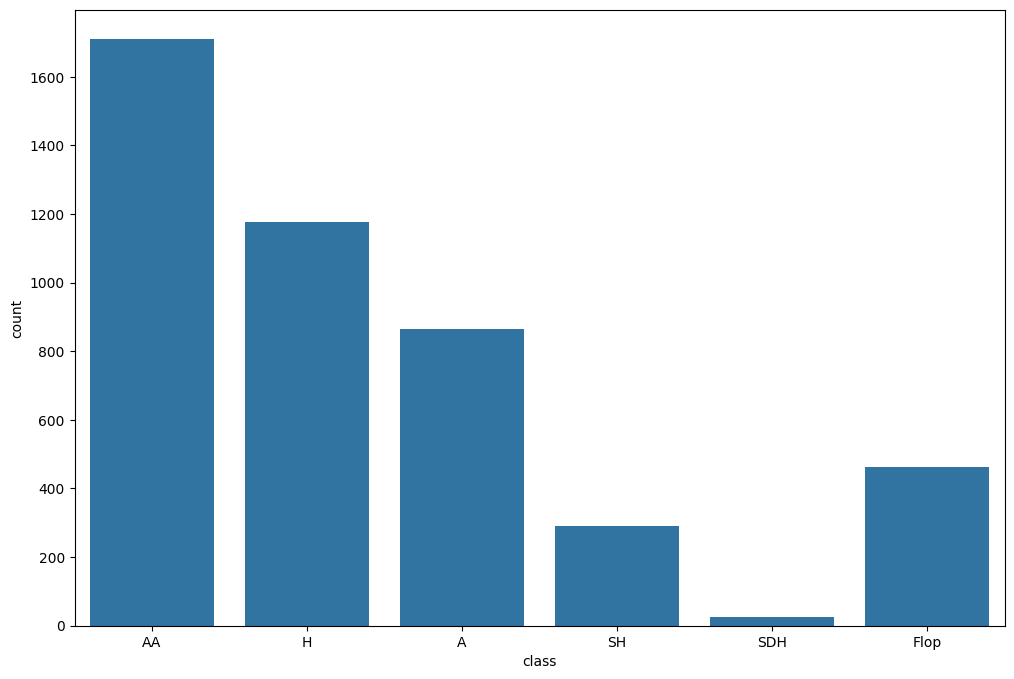

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(x=df["class"])
plt.show()

In [84]:
df['class'].value_counts()

class
AA      1710
H       1178
A        866
Flop     464
SH       290
SDH       24
Name: count, dtype: int64

CNN

In [85]:
import warnings
warnings.filterwarnings("ignore")

movie poplarity

In [90]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stopwords]
    return ' '.join(tokens)

def movie_hit_prediction(movie_name):
    df_ratings = pd.read_csv("movie_metadata.csv")

    # Preprocess movie titles
    df_ratings['movie_title'] = df_ratings['movie_title'].apply(lambda x: preprocess_text(x))

    # Define rating classes based on IMDb scores
    df_ratings['hit_class'] = pd.cut(df_ratings['imdb_score'], bins=[-np.inf, 4.9, 5.9, 6.9, 7.9, 8.9, np.inf], labels=[0, 1, 2, 3, 4, 5])

    # Prepare features (X) and labels (y)
    X = df_ratings[['movie_title', 'num_voted_users', 'imdb_score']]  # Access columns individually using a list
    y = df_ratings['hit_class']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize movie titles using Bag-of-Words
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train['movie_title'])

    # Convert sparse matrix to dense array
    X_train_array = X_train_vec.toarray()

    # Build and train the model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_array.shape[1],)),
        Dense(6, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_array, y_train, epochs=10, batch_size=16, verbose=0)

    # Preprocess the input movie title and predict the hit class
    movie_name_processed = preprocess_text(movie_name)
    movie_name_vec = vectorizer.transform([movie_name_processed])
    movie_name_array = movie_name_vec.toarray()  # Convert sparse matrix to dense array
    pred_probabilities = model.predict(movie_name_array)
    pred_y = np.argmax(pred_probabilities, axis=1)  # Get the index of the class with the highest probability
    return pred_y[0]

mn = 'The Horseman on the Roof'
print(movie_hit_prediction(mn))





1/1 [==============================] - 0s 131ms/step
3


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler

# Function for movie hit prediction with 1D-CNN
def movie_hit_predection(movie_name):
    # Read the movie dataset
    df_ratings = pd.read_csv("movie_metadata.csv")

    # Preprocess movie titles
    df_ratings['movie_title'] = df_ratings['movie_title'].apply(lambda x: preprocess_text(x))

    # Define rating classes based on IMDb scores
    df_ratings['hit_class'] = pd.cut(df_ratings['imdb_score'], bins=[-np.inf, 4.9, 5.9, 6.9, 7.9, 8.9, np.inf], labels=[0, 1, 2, 3, 4, 5])

    # Prepare features (X) and labels (y)
    X = df_ratings[['movie_title', 'num_voted_users', 'imdb_score']]  # Access columns individually using a list
    y = df_ratings['hit_class']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize movie titles using CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train['movie_title'])
    X_test_vec = vectorizer.transform(X_test['movie_title'])

    # Convert sparse matrix to dense array
    X_train_array = X_train_vec.toarray()
    X_test_array = X_test_vec.toarray()

    # Standardize numerical features
    scaler = StandardScaler()
    X_train_array[:, 1:] = scaler.fit_transform(X_train_array[:, 1:])
    X_test_array[:, 1:] = scaler.transform(X_test_array[:, 1:])

    # Reshape for 1D-CNN
    X_train_array = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
    X_test_array = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

    # Build the 1D-CNN model
    model = Sequential([
        Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_train_array.shape[1], 1)),
        Dropout(0.1),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(6, activation='softmax')
    ])

    # Compile the model with RMSprop optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

    # Train the model on the training data
    model.fit(X_train_array, y_train, epochs=10, batch_size=16, verbose=0)

    # Preprocess the input movie title and predict the hit class
    movie_name_processed = preprocess_text(movie_name)
    movie_name_vec = vectorizer.transform([movie_name_processed])
    movie_name_array = movie_name_vec.toarray()
    movie_name_array[:, 1:] = scaler.transform(movie_name_array[:, 1:])
    movie_name_array = movie_name_array.reshape(1, movie_name_array.shape[1], 1)
    pred_probabilities = model.predict(movie_name_array)
    pred_y = np.argmax(pred_probabilities, axis=1)
    return pred_y[0]

# Input movie title
mn = 'Death Calls'


print(movie_hit_prediction_cnn(mn))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1


In [92]:
import pandas as pd
import numpy as np
import nltk
import json
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import unique
from sklearn.neural_network import MLPClassifier

def audience_prediciton(movie_name):
        df_ratings = pd.read_csv("movie_metadata.csv")
        original_title = df_ratings['movie_title']
        org_title = []
        #Removing white space
        for tile in original_title:
                org_title.append(tile.strip())

        df_ratings['movie_title'] = org_title


        ratings = df_ratings["imdb_score"]
        rating_list = []
        for rating in ratings:
                if rating >= 0 and rating <= 5.9:
                        rating_list.append(1)
                elif rating >= 6 and rating <= 6.9:
                        rating_list.append(2)
                elif rating >= 7 and rating <= 7.9:
                        rating_list.append(3)
                else:
                        rating_list.append(4)

        df_ratings['audience_class'] = rating_list

        df = df_ratings[['num_voted_users', 'imdb_score', 'audience_class']]

        x = df.drop('audience_class', axis=1)
        y = df['audience_class']
        # print(y)
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

        mlp = MLPClassifier()
        mlp.fit(xtrain, ytrain)
        x_test=[]
        no_votes=0
        score_val=0
        df_rv2 = df_ratings.loc[df_ratings['movie_title']==movie_name, ['num_voted_users', 'imdb_score']]
        for votes in df_rv2["num_voted_users"]:
                no_votes = votes
        for score in df_rv2["imdb_score"]:
                #print(score)
                score_val = score

        predict_result = mlp.predict([[no_votes,score_val]])

        return predict_result

mn='Avatar'
print(audience_prediciton(mn))

[2]


In [87]:
def target_audience(movie_name):
  results=[]
  print(movie_name)
  ta_prediction=audience_prediciton(movie_name)
  print("pre=",ta_prediction)
  predict_res=ta_prediction[0]
  if predict_res==1:
    result="Junior"
  elif predict_res==2:
    result="Teenage"
  elif predict_res == 3:
    result = "Mid-age"
  else:
    result = "Senior"
  print('Target audience for the movie',movie_name,'is',result)

In [93]:
target_audience('The Princess Diaries')

The Princess Diaries
pre= [4]
Target audience for the movie The Princess Diaries is Senior


In [94]:
target_audience('Avatar')

Avatar
pre= [4]
Target audience for the movie Avatar is Senior


In [95]:
def target_audience_name(score):
    if score==1:
        audience="Junior"
    elif score==2:
        audience="Teenage"
    elif score == 3:
        audience = "Mid-age"
    else:
        audience = "Senior"
    return audience

In [96]:
def movie_hit_name(value):
    if value==0:
        pred="F"
    elif value==1:
        pred="A"
    elif value == 2:
        pred = "AA"
    elif value==3:
        pred="H"
    elif value==4:
        pred= "SH"
    else:
        pred = "SDH"
    return pred

In [97]:
import pandas as pd

def recommend_movies_from_description(movie_description):
    
    recommended_movies = recommend_new(movie_description)
    movie_names = []
    target_audience_scores = []
    movie_hit_scores = []
    target_audience=[]
    movie_hit=[]
   
    for movie_name in recommended_movies:
        target_audience_score = audience_prediciton(movie_name)
        movie_hit_score = movie_hit_prediction(movie_name)
        movie_names.append(movie_name)
        target_audience_scores.append(target_audience_score)
        movie_hit_scores.append(movie_hit_score)
        
        target_audience.append(target_audience_name(target_audience_score))
        movie_hit.append(movie_hit_name(movie_hit_score))
    
    
    avg_target_audience = sum(target_audience_scores) / len(target_audience_scores)
    avg_movie_hit = sum(movie_hit_scores) / len(movie_hit_scores)
    
    recommendations_df = pd.DataFrame({
        'Movie Name': movie_names,
        'Target Audience': target_audience,
        'Movie Hit Prediction': movie_hit
    })
    
    
    print("Recommended Movies:")
    print(recommendations_df)
    

movie_description = "A thrilling action-packed movie set in space."
recommend_movies_from_description(movie_description)


1/1 [==============================] - 0s 54ms/step
Recommended Movies:
                     Movie Name Target Audience Movie Hit Prediction
0                   Death Calls          Junior                    F
1  Space Pirate Captain Harlock          Junior                   AA
2                      Serenity         Mid-age                   SH
3                       Lockout          Senior                   AA
4                    Jackass 3D         Mid-age                    H


In [98]:
recommend_movies_from_description('In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.')

1/1 [==============================] - 0s 88ms/step
Recommended Movies:
                     Movie Name Target Audience Movie Hit Prediction
0                     Apollo 18         Mid-age                    A
1                  The American          Junior                   SH
2              Tears of the Sun         Mid-age                   AA
3  The Adventures of Pluto Nash         Teenage                    F
4                 Falcon Rising         Mid-age                    A


In [99]:
recommend_movies_from_description('Led by Woody, Andys toys live happily in his room until Andys birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andys heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.')

1/1 [==============================] - 0s 49ms/step
Recommended Movies:
               Movie Name Target Audience Movie Hit Prediction
0             Toy Story 2         Mid-age                    H
1             Toy Story 3         Teenage                    H
2  For Your Consideration         Teenage                    H
3             Match Point         Teenage                    F
4               Losin' It         Mid-age                   AA
